This notebook will be used to calculate the titration curve for a 51.3 mL solution of 0.131 M acetic acid with 0.0953 M NaOH. First things, import dependencies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Titration curves for monoprotic acids and bases have three sections. For a weak acid/strong base titration these three sections are the section from zero added base up to the half-equivalence point (more HA than A$^{-}$), the section from the half-equivalence point to the equivalence point (more A$^{-}$ than HA), and the section after the equivalence point, where only the titrant base (unreacted NaOH) is important. So, before we try to create a titration curve, let's figure out the equivalence point and half-equivalence point volumes. As you (hopefully) remember, the equivalence point is where the number of moles of weak acid *exactly* equals the number of moles of strong base.

In [2]:
acid_VolI = 0.0513
acid_ConI = 0.131

acid_MolI = acid_VolI * acid_ConI
print("The initial number of moles of acetic acid is", "{:.3}".format(acid_MolI), "moles.")

base_Con = 0.0953
eq_pt = acid_MolI/base_Con

print("The equivalence point occurs at", "{:.3}".format(eq_pt), "liters of", base_Con, "M NaOH.")

half_eq_pt = eq_pt/2
print("The half-equivalence point occurs at", "{:.3}".format(half_eq_pt), "liters of", base_Con, "M NaOH.")


The initial number of moles of acetic acid is 0.00672 moles.
The equivalence point occurs at 0.0705 liters of 0.0953 M NaOH.
The half-equivalence point occurs at 0.0353 liters of 0.0953 M NaOH.


Now that we know the half-equivalence point, we need a bunch of volumes of added NaOH from zero up to, but not including, the half-equivalence point and a bunch of volumes from the half-equivalence point up to, but not including, the equivalence point.

In [3]:
datapts = 100

xrange = np.linspace(0,half_eq_pt,num=datapts,endpoint=False,retstep=True)
PreHalfEqVols = xrange[0]
VolStep = xrange[1]

xrange = np.linspace(half_eq_pt,eq_pt,num=datapts,endpoint=False,retstep=True)
PostHalfEqVols = xrange[0]
VolStep2 = xrange[1]


Now that we have a bunch of volumes of added NaOH, which will form the x-axis for our titration curve, we need to do an equilibrium calculation for each point. From the initial solution up to the half-equivalence point we have more acetic acid than acetate, and so the equilibrium in question is:

$$\textrm{CH}_{3}\textrm{COOH}_{(aq)} + \textrm{H}_{2}\textrm{O} \rightarrow \textrm{H}_{3}\textrm{O}^{+}_{(aq)} + \textrm{CH}_{3}\textrm{COO}^{-}_{(aq)} \qquad \textrm{K}_{a} = 1.76 \textrm{x} 10^{-5}$$

For our equilibrium calculation at each volume, the initial number of moles of acetic acid for the ICE table will be the initial number of moles of acetic acid *minus* the number of moles of added NaOH, the initial number of moles of acetate will *equal* the number of moles of added NaOH, and the total volume will be the initial volume of the acid solution *plus* the volume of added NaOH. To solve the equilibria, we will need to solve a quadratic equation, so let's first copy the quadratic equation solver from the AgCl solubility notebook, and test it out.

In [4]:
def quad_solve(a, b, c):
    discrim = np.sqrt(b**2 - 4 * a * c)
    sol1 = (-b + discrim)/(2 * a)
    sol2 = (-b - discrim)/(2 * a)
    return [sol1,sol2]

solutions = quad_solve(1,1.76E-5,-0.131*1.76E-5)
conc_H3O = solutions[0]
pH = -np.log10(conc_H3O)

print("The initial pH of this solution is", "{:.3}".format(pH))

The initial pH of this solution is 2.82


That seems to work (we could check it with pencil and paper, if we wanted), so now let's calculate the pH for the solution for all of the added NaOH volumes. We will want to be a little careful and work with moles, then use the new, total volume to calculate the concentration.

In [9]:
equilibConst = 1.76E-5
H3O_water = 1E-7
init_baseConc = (PreHalfEqVols*base_Con)/(PreHalfEqVols+acid_VolI)
init_acidConc = (acid_ConI*acid_VolI-PreHalfEqVols*base_Con)/(PreHalfEqVols+acid_VolI)

pre_solutions = quad_solve(1,init_baseConc+equilibConst+H3O_water,init_baseConc*H3O_water-init_acidConc*equilibConst)
preH3Oconc = pre_solutions[0]
pre_pH = -np.log10(preH3Oconc)

Let's check to see if the pH values look correct.

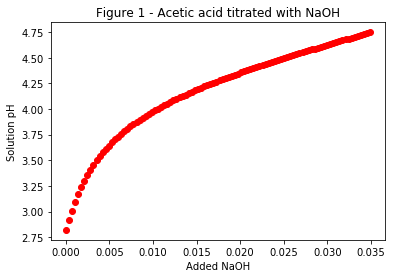

In [10]:
plt.plot(PreHalfEqVols, pre_pH, 'ro')
plt.title("Figure 1 - Acetic acid titrated with NaOH")
plt.xlabel('Added NaOH')
plt.ylabel('Solution pH')
plt.show()

The graph has the expected shape, and the pH range is what we expect, so it looks like we've done it correctly!

Now, follow the work above to calculate the pH of the solution from the half equivalence point to the equivalence point. Be careful, though, because the solution now has more acetate than acetic acid, and so the important reaction is:

$$\textrm{CH}_{3}\textrm{COO}^{-}_{(aq)} + \textrm{H}_{2}\textrm{O} \rightarrow \textrm{OH}^{-}_{(aq)} + \textrm{CH}_{3}\textrm{COOH}_{(aq)} \qquad \textrm{K}_{b} = \frac{\textrm{K}_{w}}{\textrm{K}_{a}} = 5.67 \textrm{x} 10^{-10}$$

Note that I've already created the OH$^{-}$ volumes as a list called PostHalfEqVols. I should also remind you that as the acetic acid concentration gets small, the OH$^{-}$ from the autoionization of water will become important, so you will need to include it in your calculation (I didn't really account for it above).

Now that you've calculated the pH from the half equivalence point to the equivalence point, combine your data points with the data points from above and graph the pH of the acetic acid solution as a function of added NaOH, with the pre half equivalent points shown in red and the post half equivalence points shown in blue.

Finally, calculate the pH from the equivalence point up to 0.15 liters of NaOH added. This should be more straightforward than above, because you only have to worry about the OH$^{-}$ from the titrant. Combine these data points with the data points above, and graph the whole titration curve, with the points up to the half equivalence point in red, the points from the half equivalence point to the equivalence point in blue, and the points after the equivalence point in green.